### Association Rules
- This is an unsupervised technique to unravel any pattern or relation between items/entities
- The algorithm that is used to extract these associations is apriori algorithm that has a downward closure property
- The rules that we obtain depend on basically three factors known as support, confidence and lift
- The rule is created, for eg:  A=> (implies) B i.e is if A is purchased B is also purchased 
  - If support is very high, it implies that the rule is clearly evident and trivial. In most of the transactions you have A and B. Hence we generally give low support to extact hidden associations
  - If confidence is very high, it implies the rule is strong.
  - If lift is high then the association is very strong
- Ideally, we look for rules that have low support, high confidence and high lift

In [1]:
# Uncomment the below line to install the module required to install mlxtend
!pip install mlxtend
# mlxtend : Machine learning extensions

In [2]:
# Importing required modules
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx

#### 1. What is transactional data?

In [4]:
# Read the transactional dataset
# Use ['Id','Items'] as columns names
# Look at the sample

trans=pd.read_csv("Transactions.csv",header=None)
trans.columns=['Id','Items']
trans.head()

,Id,Items
0,1001,Choclates
1,1001,Pencil
2,1001,Marker
3,1002,Pencil
4,1002,Choclates


#### 2. What is transactional matrix?

In [6]:
# Now that we discussed what is transactional matrix, try creating such matrix for above data

basket1= pd.crosstab(trans.Id, trans.Items).astype('bool').astype('int')
basket1.columns.name=None
basket1.index.name=None
basket1

,Choclates,Coke,Cookies,Eraser,Marker,Pencil
1001,1,0,0,0,1,1
1002,1,0,0,0,0,1
1003,0,1,0,1,0,1
1004,1,0,1,0,0,1
1005,0,0,0,0,1,0
1006,0,0,0,0,1,1
1007,1,0,0,0,0,1
1008,1,0,1,0,0,1
1009,0,0,0,0,1,1
1010,0,1,0,0,1,0


#### 3. What is item set and frequently occuring items?

What is support and how is it calculated?

In [5]:
# use apriori(transactional_matrix, min_support=0.07, use_colnames=True) to find the frequent items / item set

frequent_itemsets = apriori(basket1, min_support=0.07, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.5,(Choclates)
1,0.2,(Coke)
2,0.2,(Cookies)
3,0.1,(Eraser)
4,0.5,(Marker)
5,0.8,(Pencil)
6,0.2,"(Choclates, Cookies)"
7,0.1,"(Choclates, Marker)"
8,0.5,"(Pencil, Choclates)"
9,0.1,"(Eraser, Coke)"


In [6]:
# Sort the frequest items based on the support values

frequent_itemsets.sort_values(['support'],ascending=[0])

,support,itemsets
5,0.8,(Pencil)
0,0.5,(Choclates)
4,0.5,(Marker)
8,0.5,"(Pencil, Choclates)"
14,0.3,"(Pencil, Marker)"
12,0.2,"(Pencil, Cookies)"
2,0.2,(Cookies)
6,0.2,"(Choclates, Cookies)"
15,0.2,"(Pencil, Choclates, Cookies)"
1,0.2,(Coke)


#### 4. What are association rules?

What are the metrics of measuring the performance of the rule?

In [7]:
# Use association_rules(frequent item data, metric="lift", min_threshold=1) to generate association rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Choclates),(Cookies),0.5,0.2,0.2,0.400,2.00,0.10,1.333333
1,(Cookies),(Choclates),0.2,0.5,0.2,1.000,2.00,0.10,inf
2,(Pencil),(Choclates),0.8,0.5,0.5,0.625,1.25,0.10,1.333333
3,(Choclates),(Pencil),0.5,0.8,0.5,1.000,1.25,0.10,inf
4,(Eraser),(Coke),0.1,0.2,0.1,1.000,5.00,0.08,inf


leverage is: difference between frequency of item A and B together and expected freq of A and B if they are independent. 

support(A=>B)-support(A)*support(B). 

Range of values [0,1]. 

If 0 then A and B are independent

conviction: 1-support(B)/1-confidence(A=>B). 

Range of values [0,inf]. 

Close to 0 or low conviction values imply low degree of association; and higher values imply 
dependency (Association)

#### 5. Understanding the performance of rules

1. Sort the rules by support, confidence and lift
2. Plot the rules on support and confidence
3. Relationship diagram of rules

In [8]:
# Filter rules with lift >= 1.5, confidence >= 0.8 and support < 0.2

rules[(rules['lift'] >= 1.5) &
      (rules['confidence'] >= 0.8) &
      (rules['support'] <0.2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Eraser),(Coke),0.1,0.2,0.1,1.0,5.0,0.08,inf
20,"(Pencil, Eraser)",(Coke),0.1,0.2,0.1,1.0,5.0,0.08,inf
21,"(Pencil, Coke)",(Eraser),0.1,0.1,0.1,1.0,10.0,0.09,inf
24,(Eraser),"(Pencil, Coke)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [9]:
# Saperating support and confidence to plot

import numpy as np
support = np.array(rules.loc[:,'support'])
confidence = np.array(rules.loc[:,'confidence'])

support,confidence

(array([0.2, 0.2, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.4  , 1.   , 0.625, 1.   , 1.   , 0.5  , 0.5  , 0.2  , 0.25 ,
        1.   , 0.125, 1.   , 0.4  , 1.   , 1.   , 0.25 , 0.4  , 1.   ,
        1.   , 0.125, 1.   , 1.   , 1.   , 0.125, 1.   , 0.5  ]))

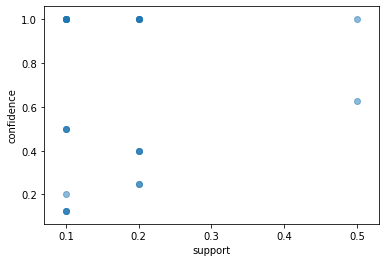

In [10]:
# Plot Support on x-axis, confidence on y-axis

import random
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(support, confidence,   alpha=0.5, marker="o")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

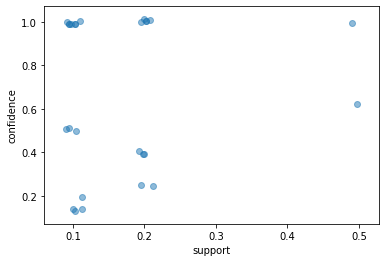

In [11]:
# Since the points are overlaping, let's just manupilte it a bit to see the spread

for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

plt.scatter(support, confidence,   alpha=0.5, marker="o")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [12]:
# Function to plot relationship between rules
rules = rules.values
rules[0]

array([frozenset({'Choclates'}), frozenset({'Cookies'}), 0.5, 0.2, 0.2,
       0.4, 2.0, 0.1, 1.3333333333333335], dtype=object)

In [13]:
## Draw a network graph

def draw_graph(rules, rules_to_show):
    
    G1 = nx.DiGraph()
   
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])
    
        for a in rules[i,0]:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i))
       
        for c in rules[i,1]:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c)
    
    color_map = []
    strs=[]
    for i in range (rules_to_show):
        strs.append("R"+str(i))
#     strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5','R6']
    for node in G1:
        if node in strs:
            color_map.append("yellow")
        else:
            color_map.append("green")
    

    edges = G1.edges()
 
    pos = nx.spring_layout(G1, k=10)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color="black")
   
    for p in pos:  # raise text positions
        pos[p][1] += 0.1
    nx.draw_networkx_labels(G1, pos)
    plt.show()

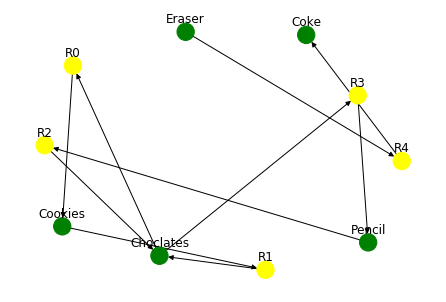

In [14]:
# conver the data frame to array and use the above function to plot

#rules=rules.values
draw_graph(rules,5)

### Activity

1. Given to you is a RetailDataset. You need to identify the rules for survival
2. Given to you is a transactions data, bring out the associations using apriori algorithm

In [15]:
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

In [24]:
retail_data = pd.read_excel('Superstore_Sales.xls', sheet_name = 0)[['Customer ID', 'Sub-Category']]

In [25]:
tdata = retail_data.pivot_table(index='Customer ID', columns='Sub-Category', aggfunc=len)
tdata= tdata.reset_index()
tdata.columns.name = ''

In [26]:
tdata = tdata.fillna(0)
tdata.head()

,Customer ID,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
0,AA-10315,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
1,AA-10375,2.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0
2,AA-10480,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,2.0,0.0,1.0
3,AA-10645,0.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,4.0,0.0,0.0,2.0,2.0,3.0,0.0,0.0
4,AB-10015,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0


In [27]:
tdata.columns

Index(['Customer ID', 'Accessories', 'Appliances', 'Art', 'Binders',
       'Bookcases', 'Chairs', 'Copiers', 'Envelopes', 'Fasteners',
       'Furnishings', 'Labels', 'Machines', 'Paper', 'Phones', 'Storage',
       'Supplies', 'Tables'],
      dtype='object', name='')

In [21]:
t1 = tdata.loc[:,~tdata.columns.isin(['Customer ID','index'])]
t1[t1 >= 1] = 1

/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


In [28]:
t1.columns

Index(['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs',
       'Copiers', 'Envelopes', 'Fasteners', 'Furnishings', 'Labels',
       'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'],
      dtype='object', name='')

In [29]:
t1.head()

,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [30]:
t2 = tdata['Customer ID']

In [31]:
t3 = pd.concat([t2, t1], axis=1)
t3.head()

,Customer ID,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
0,AA-10315,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
1,AA-10375,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,AA-10480,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
3,AA-10645,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,AB-10015,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [32]:
# Get the frequent item data and use it as input to the generate the association rules
# Look at the sample rules

items = apriori(t1, min_support=0.2, use_colnames=True)
rules = association_rules(items, metric="lift", min_threshold=1)

In [33]:
rules.shape
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Accessories),(Appliances),0.597730,0.448928,0.274905,0.459916,1.024475,0.006568,1.020344
1,(Appliances),(Accessories),0.448928,0.597730,0.274905,0.612360,1.024475,0.006568,1.037740
2,(Accessories),(Art),0.597730,0.622951,0.404792,0.677215,1.087109,0.032435,1.168113
3,(Art),(Accessories),0.622951,0.597730,0.404792,0.649798,1.087109,0.032435,1.148678
4,(Accessories),(Binders),0.597730,0.819672,0.508197,0.850211,1.037257,0.018254,1.203879
5,(Binders),(Accessories),0.819672,0.597730,0.508197,0.620000,1.037257,0.018254,1.058605
6,(Accessories),(Chairs),0.597730,0.513241,0.321564,0.537975,1.048191,0.014784,1.053533
7,(Chairs),(Accessories),0.513241,0.597730,0.321564,0.626536,1.048191,0.014784,1.077130
8,(Accessories),(Furnishings),0.597730,0.665826,0.412358,0.689873,1.036117,0.014374,1.077541
9,(Furnishings),(Accessories),0.665826,0.597730,0.412358,0.619318,1.036117,0.014374,1.056709


In [34]:
rules.to_csv('MarketBasket_Analysis_Results.csv')

In [35]:
# Subset the required rules where the consequent is 'survived_yes'
x=rules[rules['antecedents']!=frozenset({'Accessories'})]

In [36]:
x.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Appliances),(Accessories),0.448928,0.59773,0.274905,0.612360,1.024475,0.006568,1.037740
3,(Art),(Accessories),0.622951,0.59773,0.404792,0.649798,1.087109,0.032435,1.148678
5,(Binders),(Accessories),0.819672,0.59773,0.508197,0.620000,1.037257,0.018254,1.058605
7,(Chairs),(Accessories),0.513241,0.59773,0.321564,0.626536,1.048191,0.014784,1.077130
9,(Furnishings),(Accessories),0.665826,0.59773,0.412358,0.619318,1.036117,0.014374,1.056709


In [37]:
# Sort the rules based on support and understand the insights
x.sort_values(['support'],ascending=[0]).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
60,(Paper),(Binders),0.770492,0.819672,0.650694,0.844517,1.030311,0.019143,1.159793
61,(Binders),(Paper),0.819672,0.770492,0.650694,0.793846,1.030311,0.019143,1.113286
57,(Furnishings),(Binders),0.665826,0.819672,0.553594,0.831439,1.014356,0.007835,1.069810
56,(Binders),(Furnishings),0.819672,0.665826,0.553594,0.675385,1.014356,0.007835,1.029446
64,(Storage),(Binders),0.648172,0.819672,0.546028,0.842412,1.027743,0.014740,1.144303
65,(Binders),(Storage),0.819672,0.648172,0.546028,0.666154,1.027743,0.014740,1.053864
101,(Paper),(Storage),0.770492,0.648172,0.535939,0.695581,1.073143,0.036529,1.155738
84,(Paper),(Furnishings),0.770492,0.665826,0.535939,0.695581,1.044689,0.022926,1.097744
85,(Furnishings),(Paper),0.665826,0.770492,0.535939,0.804924,1.044689,0.022926,1.176508
100,(Storage),(Paper),0.648172,0.770492,0.535939,0.826848,1.073143,0.036529,1.325474


In [38]:
# Sort the rules based on confidence and understand the insights
x.sort_values(['confidence'],ascending=[0]).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1063,"(Appliances, Storage, Furnishings)",(Binders),0.225725,0.819672,0.208071,0.921788,1.124581,0.023050,2.305621
808,"(Accessories, Paper, Chairs)",(Binders),0.279950,0.819672,0.255990,0.914414,1.115586,0.026523,2.106989
1091,"(Storage, Paper, Appliances)",(Binders),0.257251,0.819672,0.234552,0.911765,1.112353,0.023691,2.043716
292,"(Chairs, Appliances)",(Binders),0.254729,0.819672,0.230769,0.905941,1.105248,0.021975,1.917170
1049,"(Appliances, Paper, Furnishings)",(Binders),0.259773,0.819672,0.234552,0.902913,1.101553,0.021624,1.857377
164,"(Accessories, Chairs)",(Binders),0.321564,0.819672,0.290038,0.901961,1.100392,0.026461,1.839344
824,"(Accessories, Chairs, Phones)",(Binders),0.230769,0.819672,0.208071,0.901639,1.100000,0.018916,1.833333
796,"(Accessories, Chairs, Furnishings)",(Binders),0.239596,0.819672,0.215637,0.900000,1.098000,0.019246,1.803279
836,"(Accessories, Storage, Chairs)",(Binders),0.233291,0.819672,0.209332,0.897297,1.094703,0.018109,1.755824
628,"(Accessories, Paper, Appliances)",(Binders),0.232030,0.819672,0.208071,0.896739,1.094022,0.017882,1.746333


In [39]:
# Sort the rules based on lift and understand the insights
x.sort_values(['lift'],ascending=[0]).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1617,"(Art, Paper)","(Accessories, Storage, Binders)",0.493064,0.355612,0.229508,0.465473,1.308937,0.054169,1.205530
1604,"(Accessories, Storage, Binders)","(Art, Paper)",0.355612,0.493064,0.229508,0.645390,1.308937,0.054169,1.429559
1609,"(Art, Paper, Binders)","(Accessories, Storage)",0.427491,0.411097,0.229508,0.536873,1.305952,0.053768,1.271580
1612,"(Accessories, Storage)","(Art, Paper, Binders)",0.411097,0.427491,0.229508,0.558282,1.305952,0.053768,1.296098
1574,"(Accessories, Binders, Phones)","(Art, Paper)",0.344262,0.493064,0.220681,0.641026,1.300085,0.050938,1.412178
1587,"(Art, Paper)","(Accessories, Binders, Phones)",0.493064,0.344262,0.220681,0.447570,1.300085,0.050938,1.187007
1792,"(Art, Furnishings)","(Binders, Storage, Phones)",0.421185,0.368222,0.200504,0.476048,1.292829,0.045415,1.205794
1789,"(Binders, Storage, Phones)","(Art, Furnishings)",0.368222,0.421185,0.200504,0.544521,1.292829,0.045415,1.270781
1857,"(Paper, Chairs)","(Binders, Furnishings, Phones)",0.422446,0.373266,0.201765,0.477612,1.279548,0.044081,1.199748
1844,"(Binders, Furnishings, Phones)","(Paper, Chairs)",0.373266,0.422446,0.201765,0.540541,1.279548,0.044081,1.257028
